In [5]:
import geopandas as gpd
sandagvmt=gpd.read_file('/Users/Felicia/Desktop/uds/Project/San_Diego_Region_SB743_VMT_Maps/San_Diego_Region_SB743_VMT_Maps.shp')


In [7]:
sandagvmt.head()

,OBJECTID,version,vmt_year,year_txt,scenario_i,geo,geo_id,name,vmt_type,vmt_metric,persons,vmt,vmt_per_ca,pctmean,pctmeantxt,map_legend,SHAPE_Leng,SHAPE_Area,geometry
0,1,ABM2 / 2019 RTP,2016.0,2016,434.0,City/CPA,99100.0,City of Carlsbad,Residents,Per Capita,112810.0,2387441.56,21.16,1.114858,111.5%,100% to 125% of Regional Mean,180090.164569,1.090266e+09,"POLYGON ((6251983.124 2000833.382, 6251984.701..."
1,2,ABM2 / 2019 RTP,2016.0,2016,434.0,City/CPA,99200.0,City of Chula Vista,Residents,Per Capita,266259.0,4435828.45,16.66,0.877766,87.8%,85% to 100% of Regional Mean,325247.759548,1.453404e+09,"POLYGON ((6346417.689 1827331.613, 6346418.172..."
2,3,ABM2 / 2019 RTP,2016.0,2016,434.0,City/CPA,99300.0,City of Coronado,Residents,Per Capita,24387.0,409528.20,16.79,0.884615,88.5%,85% to 100% of Regional Mean,133273.824727,3.923620e+08,"POLYGON ((6272423.998 1840458.000, 6272526.393..."
3,4,ABM2 / 2019 RTP,2016.0,2016,434.0,City/CPA,99400.0,City of Del Mar,Residents,Per Capita,4297.0,96256.36,22.40,1.180190,118.0%,100% to 125% of Regional Mean,40978.316509,4.982674e+07,"POLYGON ((6251668.554 1938015.279, 6251673.319..."
4,5,ABM2 / 2019 RTP,2016.0,2016,434.0,City/CPA,99500.0,City of El Cajon,Residents,Per Capita,100455.0,1569948.58,15.63,0.823498,82.3%,50% to 85% of Regional Mean,236801.981324,4.052352e+08,"POLYGON ((6336278.458 1882682.719, 6336421.020..."


In [6]:
sandagvmt.geo.unique()

array(['City/CPA', 'Census Tract', 'Traffic Analysis Zone'], dtype=object)

In [83]:
sandagcensus=sandagvmt[sandagvmt['geo']=="Census Tract"]
sandagcensus.name.unique()

array(['1', '2.01', '2.02', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20.01', '20.02',
       '21', '22.01', '22.02', '23.01', '23.02', '24.01', '24.02',
       '25.01', '25.02', '26.01', '26.02', '27.02', '27.03', '27.05',
       '27.07', '27.08', '27.09', '27.1', '27.11', '27.12', '28.01',
       '28.03', '28.04', '29.02', '29.03', '29.04', '29.05', '30.01',
       '30.03', '30.04', '31.01', '31.03', '31.05', '31.07', '31.08',
       '31.09', '31.11', '31.12', '31.13', '31.14', '31.15', '32.01',
       '32.02', '32.04', '32.07', '32.08', '32.09', '32.11', '32.12',
       '32.13', '32.14', '33.01', '33.03', '33.04', '33.05', '34.01',
       '34.03', '34.04', '35.01', '35.02', '36.01', '36.02', '36.03',
       '38', '39.01', '39.02', '40', '41', '42', '43', '44', '45.01',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '65', '66', '68.01',
       '68.02

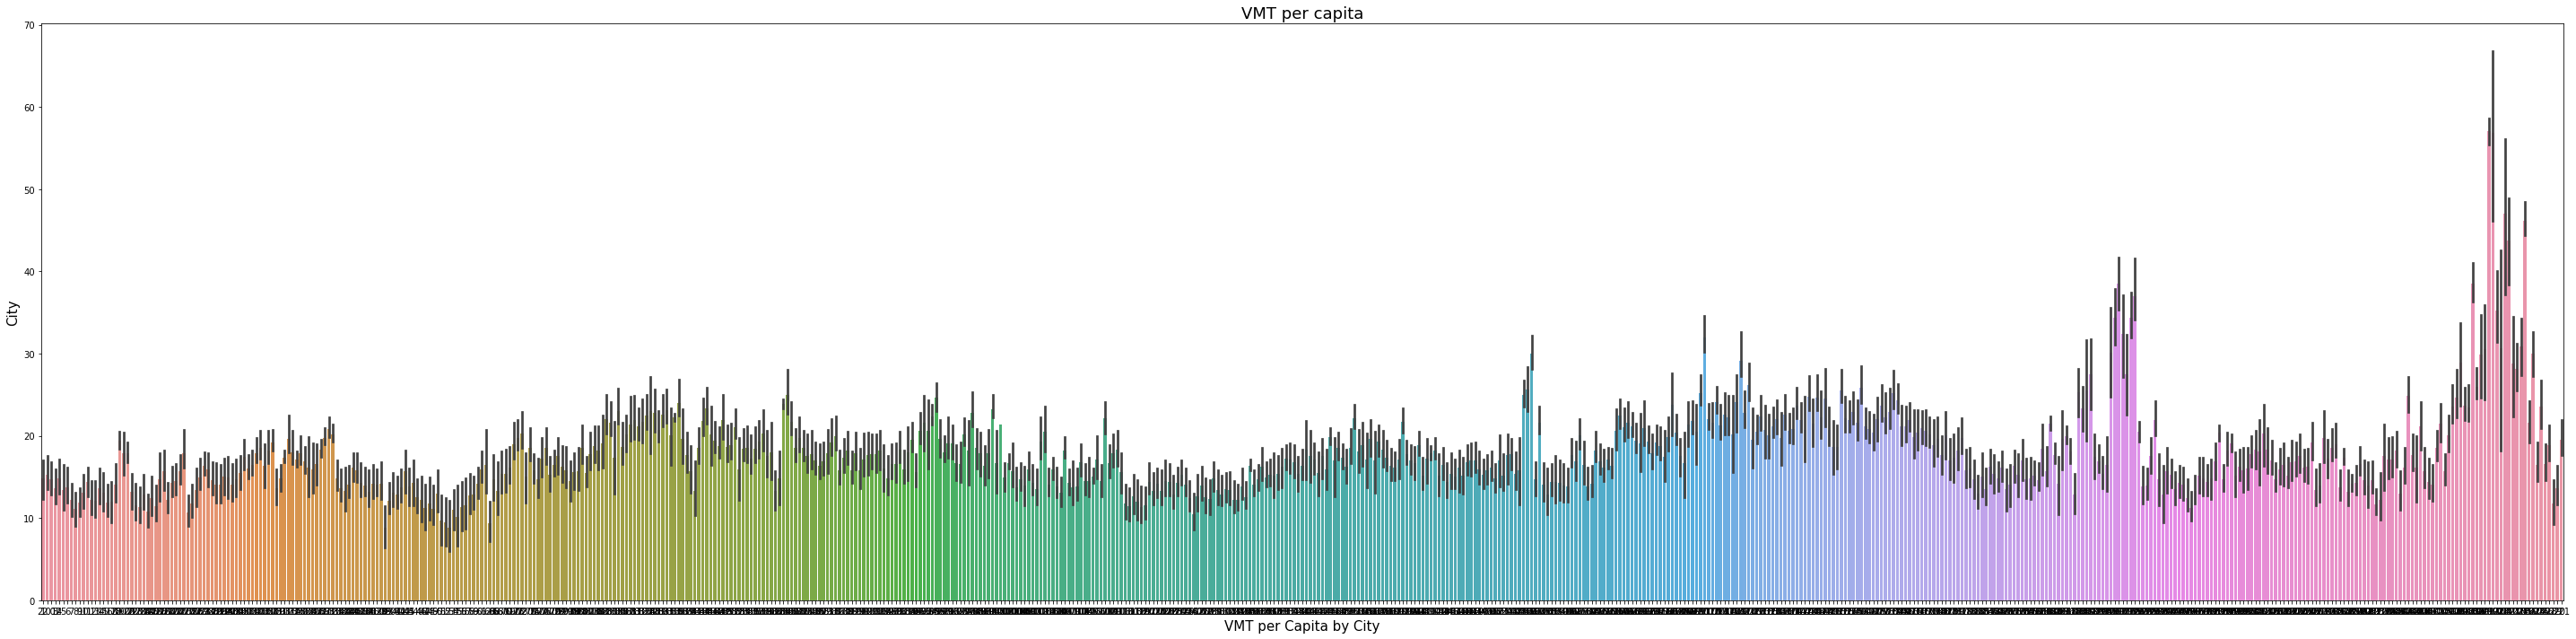

In [86]:
fig, ax = plt.subplots(figsize=(40,10))
#vmt_cities.plot(ax=ax)
#plt.bar(vmt_cities.name, vmt_cities)
#ctx.add_basemap(ax=ax, zoom=12, alpha=0.3) # 30% opacity

sns.barplot(x=sandagcensus.name, y=sandagcensus.vmt_per_ca, ax=ax)
plt.xlabel("VMT per Capita by City", size=15)
plt.ylabel("City", size=15)
plt.title("VMT per capita", size=18)
plt.tight_layout()

In [8]:
sandagcities=sandagvmt[sandagvmt['geo']=="City/CPA"]
sandagcities.name.unique()

array(['City of Carlsbad', 'City of Chula Vista', 'City of Coronado',
       'City of Del Mar', 'City of El Cajon', 'City of Encinitas',
       'City of Escondido', 'City of Imperial Beach', 'City of La Mesa',
       'City of Lemon Grove', 'City of National City',
       'City of Oceanside', 'City of Poway',
       'Balboa Park - City of San Diego',
       'Barrio Logan - City of San Diego',
       'Carmel Mountain Ranch - City of San Diego',
       'Centre City - City of San Diego',
       'Sabre Springs - City of San Diego',
       'Clairemont Mesa - City of San Diego',
       'East Elliott - City of San Diego',
       'Greater Golden Hill - City of San Diego',
       'Miramar Ranch North - City of San Diego',
       'La Jolla - City of San Diego', 'Linda Vista - City of San Diego',
       'Midway-Pacific Highway - City of San Diego',
       'Mira Mesa - City of San Diego',
       'Mission Bay Park - City of San Diego',
       'Mission Beach - City of San Diego',
       'Mission Vall

In [54]:
test=[]
for value in sandagcities.name.unique():
    
    if "City of San Diego" in value:
        test.append(value)

test

sandagcities['cityofsd']=sandagcities[sandagcities['name'] in test]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
vmt_cities=sandagcities.groupby('name')['vmt_per_ca'].mean()
vmt_cities=vmt_cities.dropna()
vmt_cities=vmt_cities.sort_values()



<AxesSubplot:ylabel='map_legend'>

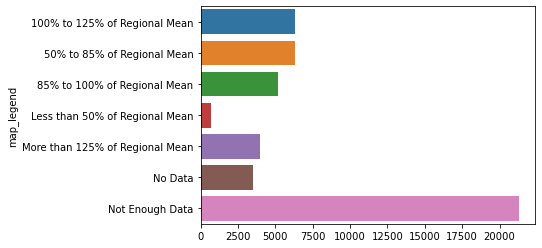

In [45]:
from matplotlib import pyplot as plt
import contextily as ctx
import seaborn as sns

percentages=sandagvmt.groupby('map_legend')['name'].size()
sns.barplot(x=percentages.values, y=percentages.index)

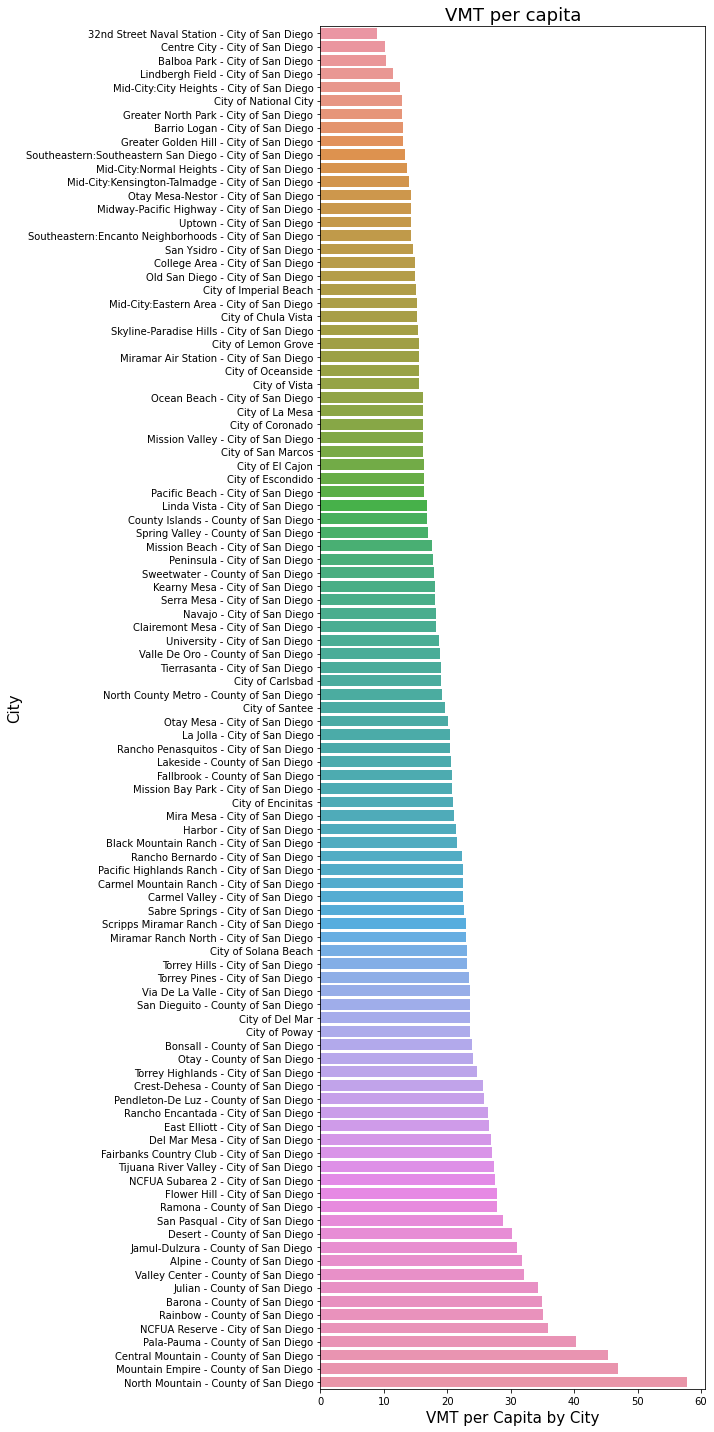

In [80]:

fig, ax = plt.subplots(figsize=(10,20))
#vmt_cities.plot(ax=ax)
#plt.bar(vmt_cities.name, vmt_cities)
#ctx.add_basemap(ax=ax, zoom=12, alpha=0.3) # 30% opacity

sns.barplot(x=vmt_cities.values, y=vmt_cities.index, ax=ax)
plt.xlabel("VMT per Capita by City", size=15)
plt.ylabel("City", size=15)
plt.title("VMT per capita", size=18)
plt.tight_layout()

In [1]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()
sd = products.ACS(2015).from_county('San Diego, CA', level='tract',
                                     variables=['B01001H_001E','B01001_001E'])
sd['pc_nonHispanicWhite'] = sd.B01001H_001E.astype(float) / sd.B01001_001E.astype(float) * 100 

C:\Users\Aaron\anaconda3\envs\environment_2\lib\site-packages\cenpy\tiger.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if kwargs.get("returnGeometry", "true") is "false":
C:\Users\Aaron\anaconda3\envs\environment_2\lib\site-packages\cenpy\tiger.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if kwargs.get("returnGeometry", "true") is "false":


KeyError: 'Response from API is malformed. You may have submitted too many queries, formatted the request incorrectly, or experienced significant network connectivity issues. Check to make sure that your inputs, like placenames, are spelled correctly, and that your geographies match the level at which you intend to query. The original error from the Census is:\\n(API ERROR 400:Unable to complete operation.([]))'

In [62]:
sd.head()

,GEOID,geometry,B01001H_001E,B01001_001E,NAME,state,county,tract,pc_nonHispanicWhite
0,06073008200,"POLYGON ((-13056074.080 3874140.300, -13055966...",2243.0,2602.0,"Census Tract 82, San Diego County, California",06,073,008200,86.202921
1,06073007905,"POLYGON ((-13053233.990 3868908.870, -13053228...",2354.0,2613.0,"Census Tract 79.05, San Diego County, California",06,073,007905,90.088021
2,06073007702,"POLYGON ((-13050996.360 3867987.160, -13050955...",3003.0,3693.0,"Census Tract 77.02, San Diego County, California",06,073,007702,81.316003
3,06073008503,"POLYGON ((-13050027.990 3871856.590, -13050023...",4268.0,6525.0,"Census Tract 85.03, San Diego County, California",06,073,008503,65.409962
4,06073008340,"POLYGON ((-13048211.030 3877959.930, -13048210...",4082.0,9045.0,"Census Tract 83.40, San Diego County, California",06,073,008340,45.129906


Text(0.5, 1.0, 'Percent non-Hispanic white residents')

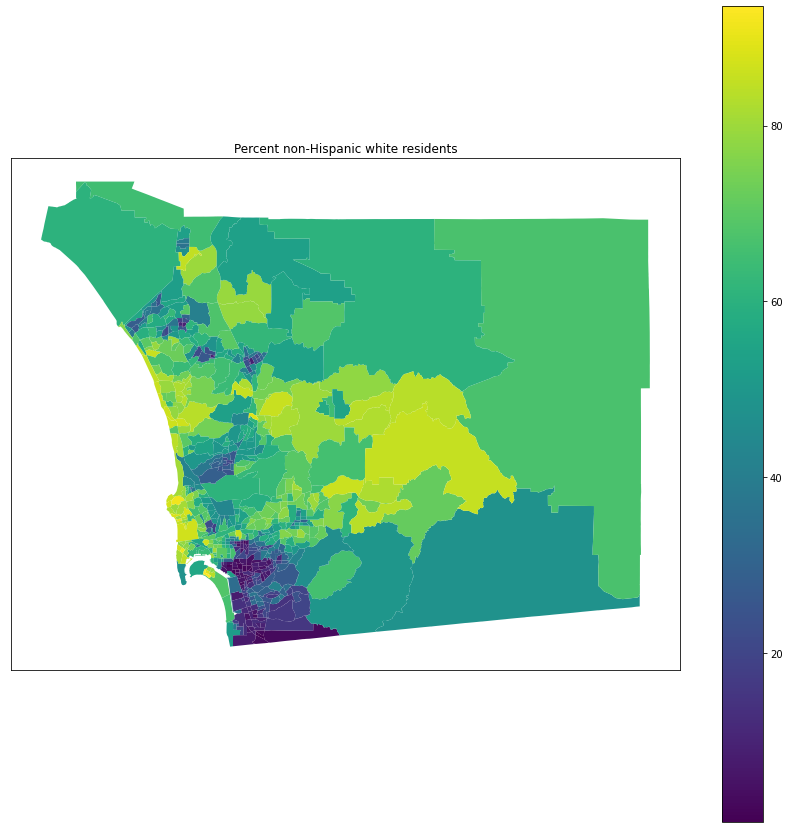

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sd.plot('pc_nonHispanicWhite', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# set the limits to remove Catalina
# I eyeballed this from the version before removing the tick labels
#ax.set_ylim([3.97*1e6, 4.15*1e6])

ax.set_title('Percent non-Hispanic white residents')

In [68]:
sd.crs #3857
sandagvmt.crs #2230

<Derived Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [92]:
sdvmt_intersects = gpd.sjoin(sandagvmt.to_crs('EPSG: 3857')[['geometry','vmt_per_ca']], 
                           sd, how="inner", predicate='intersects')

In [96]:
sdvmt_intersects

,geometry,vmt_per_ca,index_right,GEOID,B01001H_001E,B01001_001E,NAME,state,county,tract,pc_nonHispanicWhite
0,"POLYGON ((-13053529.537 3915642.470, -13053529...",21.16,300,06073019806,9041.0,12442.0,"Census Tract 198.06, San Diego County, California",06,073,019806,72.665166
11,"MULTIPOLYGON (((-13053733.668 3934492.633, -13...",18.27,300,06073019806,9041.0,12442.0,"Census Tract 198.06, San Diego County, California",06,073,019806,72.665166
78,"POLYGON ((-13052793.793 3926887.156, -13052777...",16.40,300,06073019806,9041.0,12442.0,"Census Tract 198.06, San Diego County, California",06,073,019806,72.665166
103,"POLYGON ((-13053529.537 3915642.470, -13053529...",27.30,300,06073019806,9041.0,12442.0,"Census Tract 198.06, San Diego County, California",06,073,019806,72.665166
114,"MULTIPOLYGON (((-13043174.937 3927432.188, -13...",22.49,300,06073019806,9041.0,12442.0,"Census Tract 198.06, San Diego County, California",06,073,019806,72.665166
...,...,...,...,...,...,...,...,...,...,...,...
42368,"POLYGON ((-13048794.858 3944903.377, -13048792...",20.60,147,06073019001,4530.0,6954.0,"Census Tract 190.01, San Diego County, California",06,073,019001,65.142364
42376,"POLYGON ((-13050664.068 3944417.315, -13050597...",20.76,147,06073019001,4530.0,6954.0,"Census Tract 190.01, San Diego County, California",06,073,019001,65.142364
42378,"POLYGON ((-13049358.958 3944412.517, -13049347...",NaN,147,06073019001,4530.0,6954.0,"Census Tract 190.01, San Diego County, California",06,073,019001,65.142364
42379,"POLYGON ((-13047209.004 3943424.364, -13047208...",26.17,147,06073019001,4530.0,6954.0,"Census Tract 190.01, San Diego County, California",06,073,019001,65.142364


<AxesSubplot:>

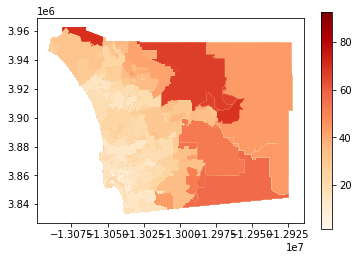

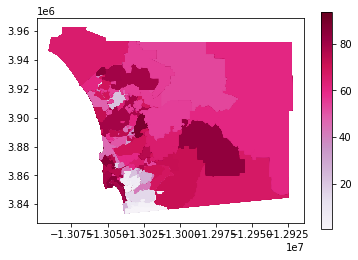

In [98]:
sdvmt_intersects.plot('vmt_per_ca',  cmap='OrRd', legend=True)
sdvmt_intersects.plot('pc_nonHispanicWhite',  cmap='PuRd', legend=True)


Text(0.5, 1.0, 'Vmt per capita, Census Tracts')

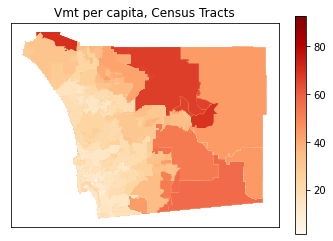

In [101]:
fig, ax = plt.subplots()
sdvmt_intersects.plot('vmt_per_ca',  cmap='OrRd', legend=True, ax=ax)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])


ax.set_title('Vmt per capita, Census Tracts')


Text(0.5, 1.0, 'Pct non-hispanic white, Census Tracts')

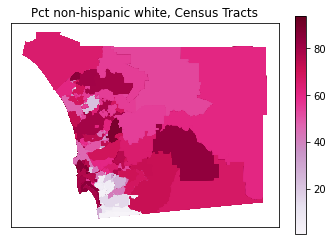

In [102]:
fig, ax = plt.subplots()
sdvmt_intersects.plot('pc_nonHispanicWhite',  cmap='PuRd', legend=True, ax=ax)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])


ax.set_title('Pct non-hispanic white, Census Tracts')